Harguna Sood (hs3159)  

AML HW - 2  
Task - 2  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as lgr
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.svm import LinearSVC 
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv("/Users/hargunasood/Downloads/data.csv")
data = data.drop(["date"], axis=1)

Task 2.1

Continuous Features:  
price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated

Categorical Features:  
street, city, statezip, country, waterfront

Removing prices where they are equal to 0 or are missing

In [3]:
data = data[data["price"]>0 | data["price"].isna() ]

Task 2.2

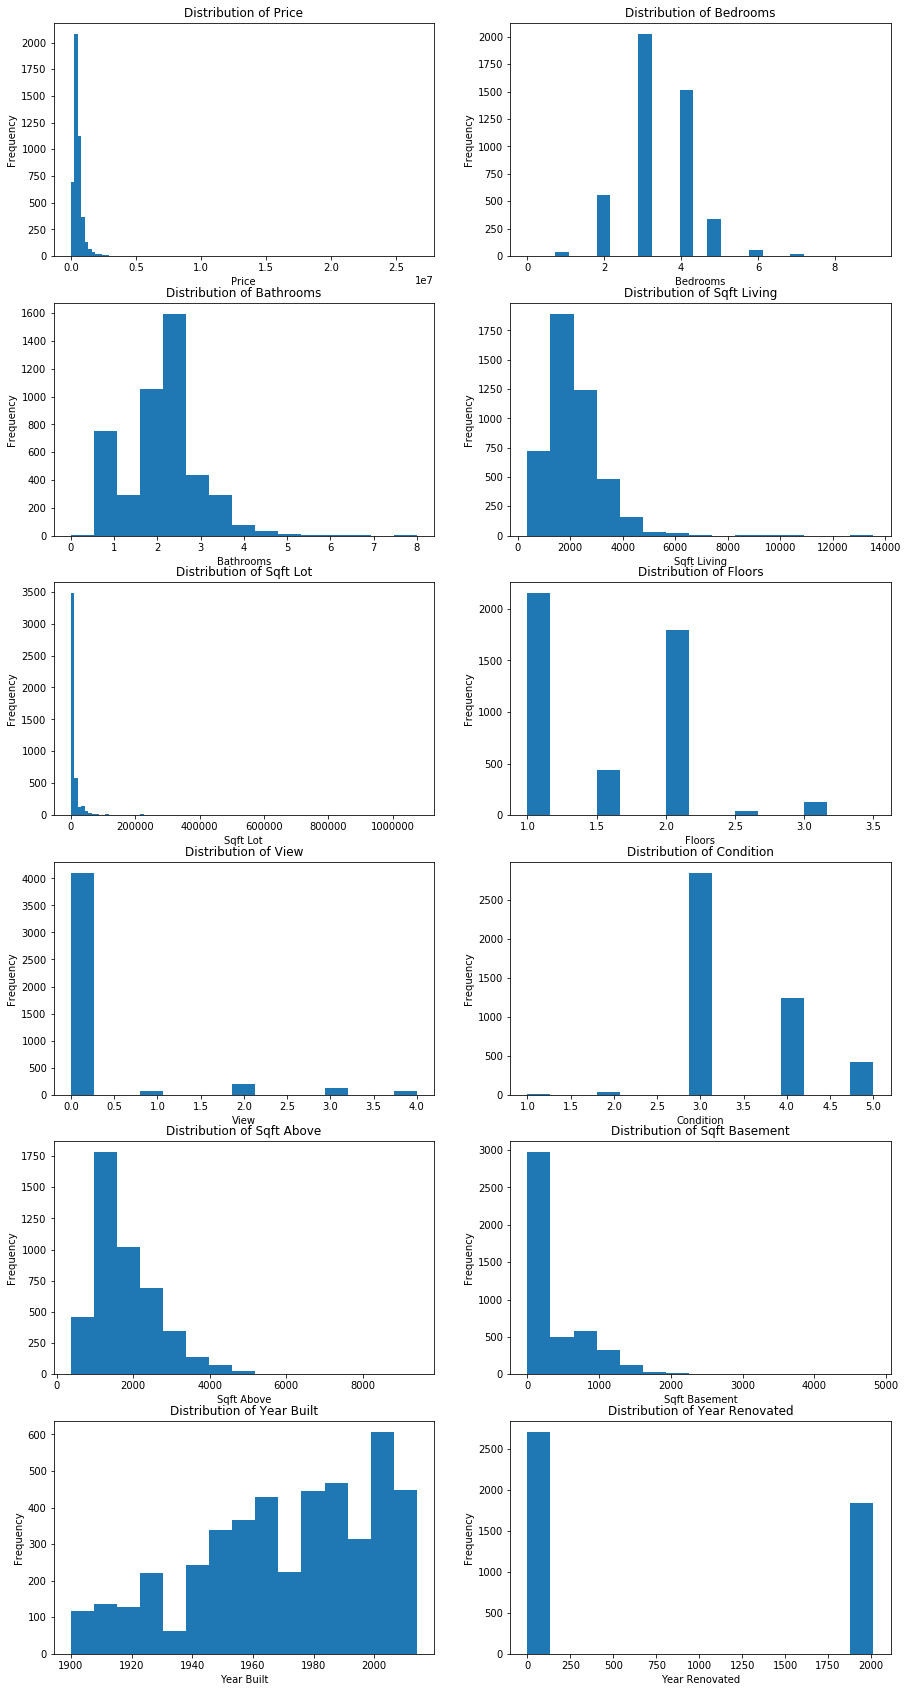

In [4]:
fig, ax = plt.subplots(6,2, figsize=(15,30));

ax[0,0].hist(data.loc[:,"price"], bins=100);
ax[0,0].set_xlabel("Price");
ax[0,0].set_ylabel("Frequency");
ax[0,0].set_title("Distribution of Price");

ax[0,1].hist(data.loc[:,"bedrooms"], bins=25);
ax[0,1].set_xlabel("Bedrooms");
ax[0,1].set_ylabel("Frequency");
ax[0,1].set_title("Distribution of Bedrooms");

ax[1,0].hist(data.loc[:,"bathrooms"], bins=15);
ax[1,0].set_xlabel("Bathrooms");
ax[1,0].set_ylabel("Frequency");
ax[1,0].set_title("Distribution of Bathrooms");

ax[1,1].hist(data.loc[:,"sqft_living"], bins=15);
ax[1,1].set_xlabel("Sqft Living");
ax[1,1].set_ylabel("Frequency");
ax[1,1].set_title("Distribution of Sqft Living");

ax[2,0].hist(data.loc[:,"sqft_lot"], bins=100);
ax[2,0].set_xlabel("Sqft Lot");
ax[2,0].set_ylabel("Frequency");
ax[2,0].set_title("Distribution of Sqft Lot");

ax[2,1].hist(data.loc[:,"floors"], bins=15);
ax[2,1].set_xlabel("Floors");
ax[2,1].set_ylabel("Frequency");
ax[2,1].set_title("Distribution of Floors");

ax[3,0].hist(data.loc[:,"view"], bins=15);
ax[3,0].set_xlabel("View");
ax[3,0].set_ylabel("Frequency");
ax[3,0].set_title("Distribution of View");

ax[3,1].hist(data.loc[:,"condition"], bins=15);
ax[3,1].set_xlabel("Condition");
ax[3,1].set_ylabel("Frequency");
ax[3,1].set_title("Distribution of Condition");

ax[4,0].hist(data.loc[:,"sqft_above"], bins=15);
ax[4,0].set_xlabel("Sqft Above");
ax[4,0].set_ylabel("Frequency");
ax[4,0].set_title("Distribution of Sqft Above");

ax[4,1].hist(data.loc[:, "sqft_basement"], bins=15);
ax[4,1].set_xlabel("Sqft Basement");
ax[4,1].set_ylabel("Frequency");
ax[4,1].set_title("Distribution of Sqft Basement");

ax[5,0].hist(data.loc[:, "yr_built"], bins=15);
ax[5,0].set_xlabel("Year Built");
ax[5,0].set_ylabel("Frequency");
ax[5,0].set_title("Distribution of Year Built");

ax[5,1].hist(data.loc[:, "yr_renovated"], bins=15);
ax[5,1].set_xlabel("Year Renovated");
ax[5,1].set_ylabel("Frequency");
ax[5,1].set_title("Distribution of Year Renovated");




Ans - There are a lot 0 values in many variables, like, view, sqft_basement, yr_renovated. However, year cannot be 0. This means that we will have to impute yr_renovated, view and sqft_basement. We can impute yr_renovated with median, and view, sqft_basement with mean.

Task 2.3

To see data more clearly, plotting log10(price) on y-axis

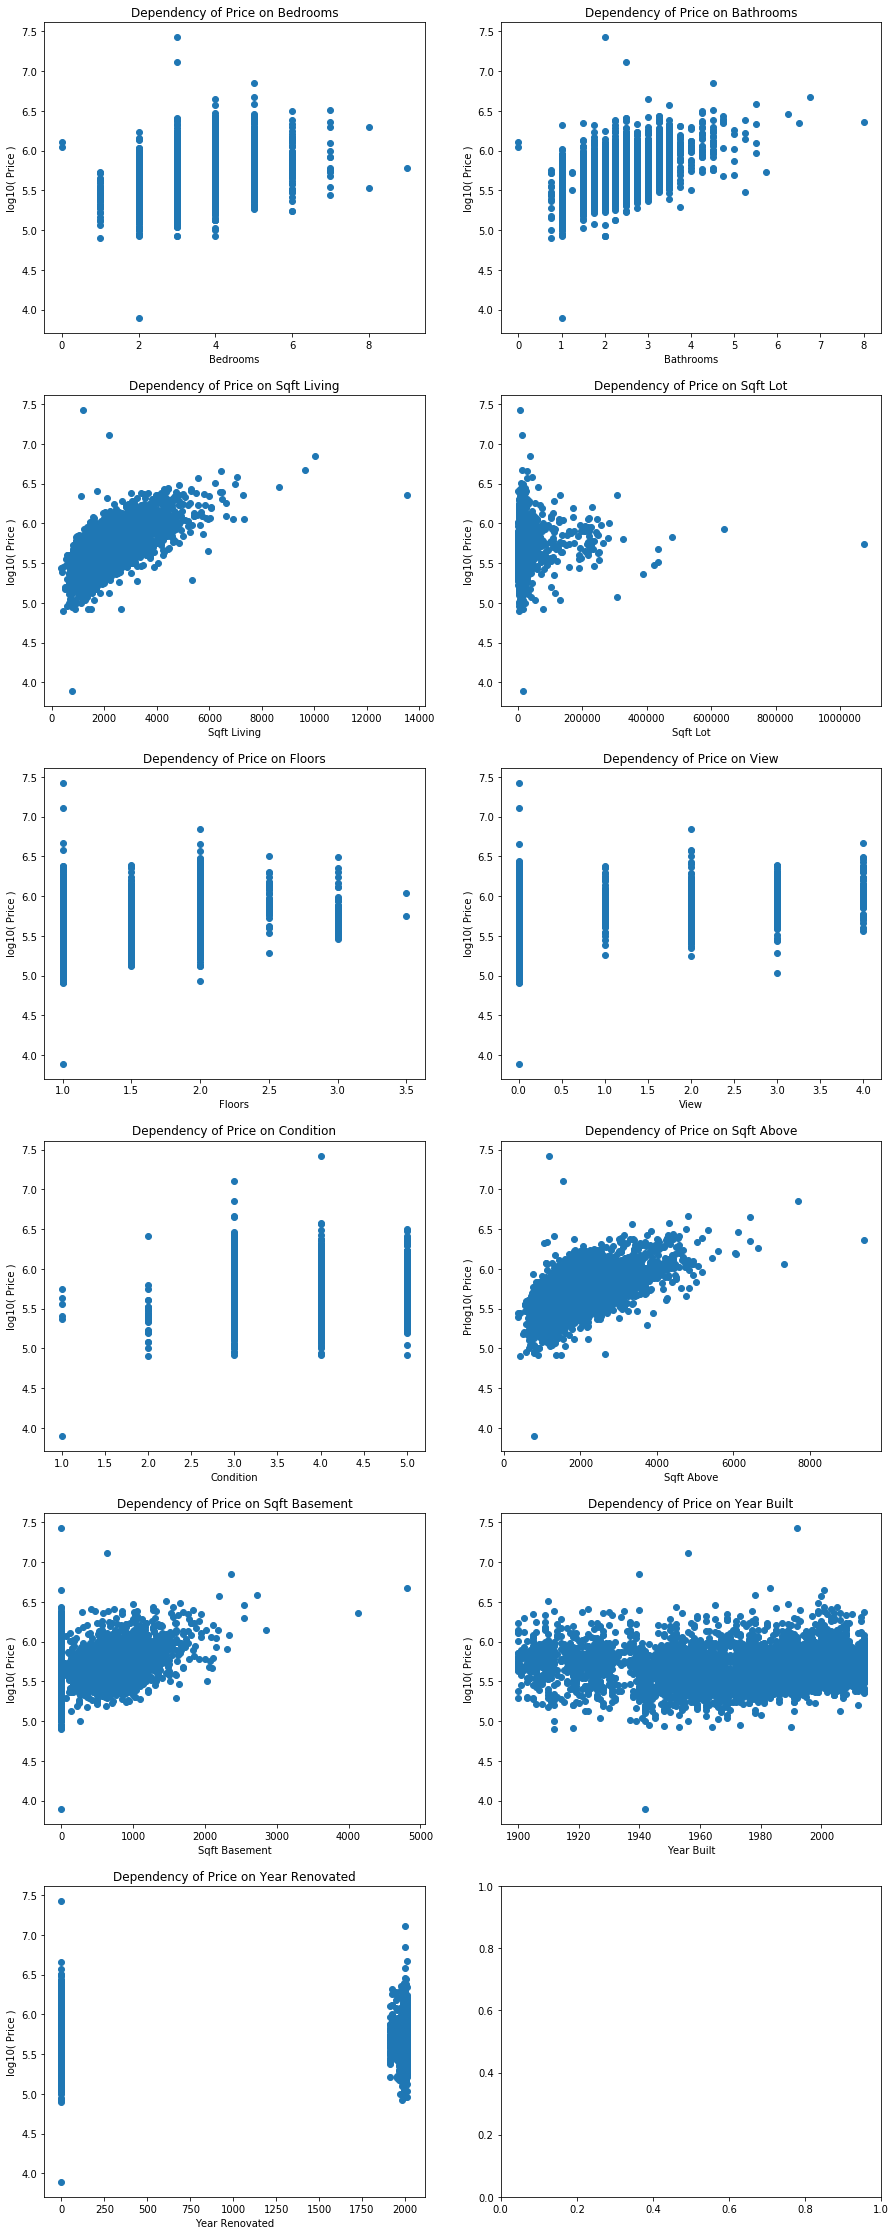

In [5]:
fig, ax = plt.subplots(6,2, figsize=(15,40));

ax[0,0].scatter(data.loc[:,"bedrooms"], np.log10(data.loc[:,"price"]));
ax[0,0].set_xlabel("Bedrooms");
ax[0,0].set_ylabel("log10( Price )");
ax[0,0].set_title("Dependency of Price on Bedrooms");

ax[0,1].scatter(data.loc[:,"bathrooms"], np.log10(data.loc[:,"price"]));
ax[0,1].set_xlabel("Bathrooms");
ax[0,1].set_ylabel("log10( Price )");
ax[0,1].set_title("Dependency of Price on Bathrooms");

ax[1,0].scatter(data.loc[:,"sqft_living"], np.log10(data.loc[:,"price"]));
ax[1,0].set_xlabel("Sqft Living");
ax[1,0].set_ylabel("log10( Price )");
ax[1,0].set_title("Dependency of Price on Sqft Living");

ax[1,1].scatter(data.loc[:,"sqft_lot"], np.log10(data.loc[:,"price"]));
ax[1,1].set_xlabel("Sqft Lot");
ax[1,1].set_ylabel("log10( Price )");
ax[1,1].set_title("Dependency of Price on Sqft Lot");

ax[2,0].scatter(data.loc[:,"floors"], np.log10(data.loc[:,"price"]));
ax[2,0].set_xlabel("Floors");
ax[2,0].set_ylabel("log10( Price )");
ax[2,0].set_title("Dependency of Price on Floors");

ax[2,1].scatter(data.loc[:,"view"], np.log10(data.loc[:,"price"]));
ax[2,1].set_xlabel("View");
ax[2,1].set_ylabel("log10( Price )");
ax[2,1].set_title("Dependency of Price on View");

ax[3,0].scatter(data.loc[:,"condition"], np.log10(data.loc[:,"price"]));
ax[3,0].set_xlabel("Condition");
ax[3,0].set_ylabel("log10( Price )");
ax[3,0].set_title("Dependency of Price on Condition");

ax[3,1].scatter(data.loc[:,"sqft_above"], np.log10(data.loc[:,"price"]));
ax[3,1].set_xlabel("Sqft Above");
ax[3,1].set_ylabel("Prlog10( Price )");
ax[3,1].set_title("Dependency of Price on Sqft Above");

ax[4,0].scatter(data.loc[:,"sqft_basement"], np.log10(data.loc[:,"price"]));
ax[4,0].set_xlabel("Sqft Basement");
ax[4,0].set_ylabel("log10( Price )");
ax[4,0].set_title("Dependency of Price on Sqft Basement");

ax[4,1].scatter(data.loc[:,"yr_built"], np.log10(data.loc[:,"price"]));
ax[4,1].set_xlabel("Year Built");
ax[4,1].set_ylabel("log10( Price )");
ax[4,1].set_title("Dependency of Price on Year Built");

ax[5,0].scatter(data.loc[:,"yr_renovated"], np.log10(data.loc[:,"price"]));
ax[5,0].set_xlabel("Year Renovated");
ax[5,0].set_ylabel("log10( Price )");
ax[5,0].set_title("Dependency of Price on Year Renovated");




Task 2.4

Splitting the data

In [6]:
train_data, test_data = tts(data, test_size=0.2, random_state=1)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

test_data_x = test_data.drop(["price"], axis=1)
test_data_y = test_data.loc[:, "price"]

train_data_x = train_data.drop(["price"], axis=1)
train_data_y = train_data.loc[:, "price"]


Categorical Treatment and Imputation

In [7]:
cat_cols = ['street', 'city', 'country', 'waterfront', 'statezip']
median_cols = ["yr_renovated"]
mean_cols = ["view", "sqft_basement"]

ohe = preprocessing.OneHotEncoder(sparse=False, handle_unknown="ignore")
preprocess = make_column_transformer((SimpleImputer(missing_values=0,
                                                                     strategy="median"), median_cols),
                                     (SimpleImputer(missing_values=0,
                                                                     strategy="mean"), mean_cols),
                                    (ohe, cat_cols))

lr = make_pipeline(preprocess, LinearRegression())
rg = make_pipeline(preprocess, Ridge())
ls = make_pipeline(preprocess, Lasso())
en = make_pipeline(preprocess, ElasticNet())


In [8]:
print("R^2 Linear Regression:", np.mean(cross_val_score(lr, train_data_x, train_data_y, cv=5)))
print("R^2 Ridge:", np.mean(cross_val_score(rg, train_data_x, train_data_y, cv=5)))
print("R^2 Lasso:", np.mean(cross_val_score(ls, train_data_x, train_data_y, cv=5)))
print("R^2 Elastic Net:", np.mean(cross_val_score(en, train_data_x, train_data_y, cv=5)))


R^2 Linear Regression: -78098774060658.86
R^2 Ridge: 0.3793406118405859


/Users/hargunasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5360415116674.289, tolerance: 107088824917.63959
  positive)
/Users/hargunasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5160601118715.051, tolerance: 111459329376.48833
  positive)
/Users/hargunasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1584160263696.1465, tolerance: 108420829327.69803
  positive)
/Users/hargunasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not 

R^2 Lasso: 0.34734218272251594
R^2 Elastic Net: 0.13668976076001862


Scaling

In [9]:
cat_cols = ['street', 'city', 'country', 'waterfront', 'statezip']
median_cols = ["yr_renovated"]
mean_cols = ["view", "sqft_basement"]
cont_cols = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "condition",
             "sqft_above", 'yr_built', "yr_renovated", "view", "sqft_basement" ]

ohe = preprocessing.OneHotEncoder(sparse=False, handle_unknown="ignore")
preprocess = make_column_transformer((SimpleImputer(missing_values=0,
                                                                     strategy="median"), median_cols),
                                     (SimpleImputer(missing_values=0,
                                                                     strategy="mean"), mean_cols),
                                     (ohe, cat_cols), (StandardScaler(), cont_cols))

lr = make_pipeline(preprocess, LinearRegression())
rg = make_pipeline(preprocess, Ridge())
ls = make_pipeline(preprocess, Lasso())
en = make_pipeline(preprocess, ElasticNet())

In [10]:
print("R^2 Linear Regression:", np.mean(cross_val_score(lr, train_data_x, train_data_y, cv=5)))
print("R^2 Ridge:", np.mean(cross_val_score(rg, train_data_x, train_data_y, cv=5)))
print("R^2 Lasso:", np.mean(cross_val_score(ls, train_data_x, train_data_y, cv=5)))
print("R^2 Elastic Net:", np.mean(cross_val_score(en, train_data_x, train_data_y, cv=5)))


R^2 Linear Regression: -39.663571371128384
R^2 Ridge: 0.5733513421347057


/Users/hargunasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2375881548137.426, tolerance: 107088824917.63959
  positive)
/Users/hargunasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2313199580954.197, tolerance: 111459329376.48833
  positive)
/Users/hargunasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 887264902307.5597, tolerance: 108420829327.69803
  positive)
/Users/hargunasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not c

R^2 Lasso: 0.46423499754307773
R^2 Elastic Net: 0.4380351512469477


Ans - Scaling improved the result for all the models. Thus, using scaling moving forward.

Task 2.5

Grid Search

In [11]:
para_grid_rg = {'ridge__alpha':[1, 5, 10, 15, 20, 25]}
grid_rg = GridSearchCV(rg, param_grid=para_grid_rg, cv=5)
grid_rg.fit(train_data_x, train_data_y)
print(grid_rg.best_params_)

{'ridge__alpha': 5}


In [12]:
ls = make_pipeline(preprocess, Lasso(max_iter=5000, tol=0.01))
para_grid_ls = {'lasso__alpha':[1, 5, 10, 15, 20, 25, 30, 35, 40]}
grid_ls = GridSearchCV(ls, param_grid=para_grid_ls, cv=5)
grid_ls.fit(train_data_x, train_data_y)
print(grid_ls.best_params_)

{'lasso__alpha': 40}


In [14]:
en = make_pipeline(preprocess, ElasticNet(max_iter=2000, tol=0.32))
para_grid_en = {'elasticnet__alpha':[0.1, 0.01, 1, 10]}
grid_en = GridSearchCV(en, param_grid=para_grid_en, cv=5)
grid_en.fit(train_data_x, train_data_y)
print(grid_en.best_params_)

{'elasticnet__alpha': 0.01}


In [15]:
rg_ = make_pipeline(preprocess, Ridge(alpha=5))
ls_ = make_pipeline(preprocess, Lasso(max_iter=5000, tol=0.01, alpha=40))
en_ = make_pipeline(preprocess, ElasticNet(max_iter=2000, tol=0.32, alpha=0.01))

In [16]:
print("R^2 Ridge:", np.mean(cross_val_score(rg_, train_data_x, train_data_y, cv=5)))
print("R^2 Lasso:", np.mean(cross_val_score(ls_, train_data_x, train_data_y, cv=5)))
print("R^2 Elastic Net:", np.mean(cross_val_score(en_, train_data_x, train_data_y, cv=5)))

R^2 Ridge: 0.5771578979784848
R^2 Lasso: 0.5934267720110561
R^2 Elastic Net: 0.5740085260099754


Ans - Result improved for all the models

Using Lasso for test-set evaluation

In [17]:
grid_ls.score(test_data_x, test_data_y)

0.31351345212697423

 Visualizing the dependence of the validation score on the parameters

In [18]:
rg_results = pd.DataFrame(grid_rg.cv_results_)
ls_results = pd.DataFrame(grid_ls.cv_results_)
en_results = pd.DataFrame(grid_en.cv_results_)

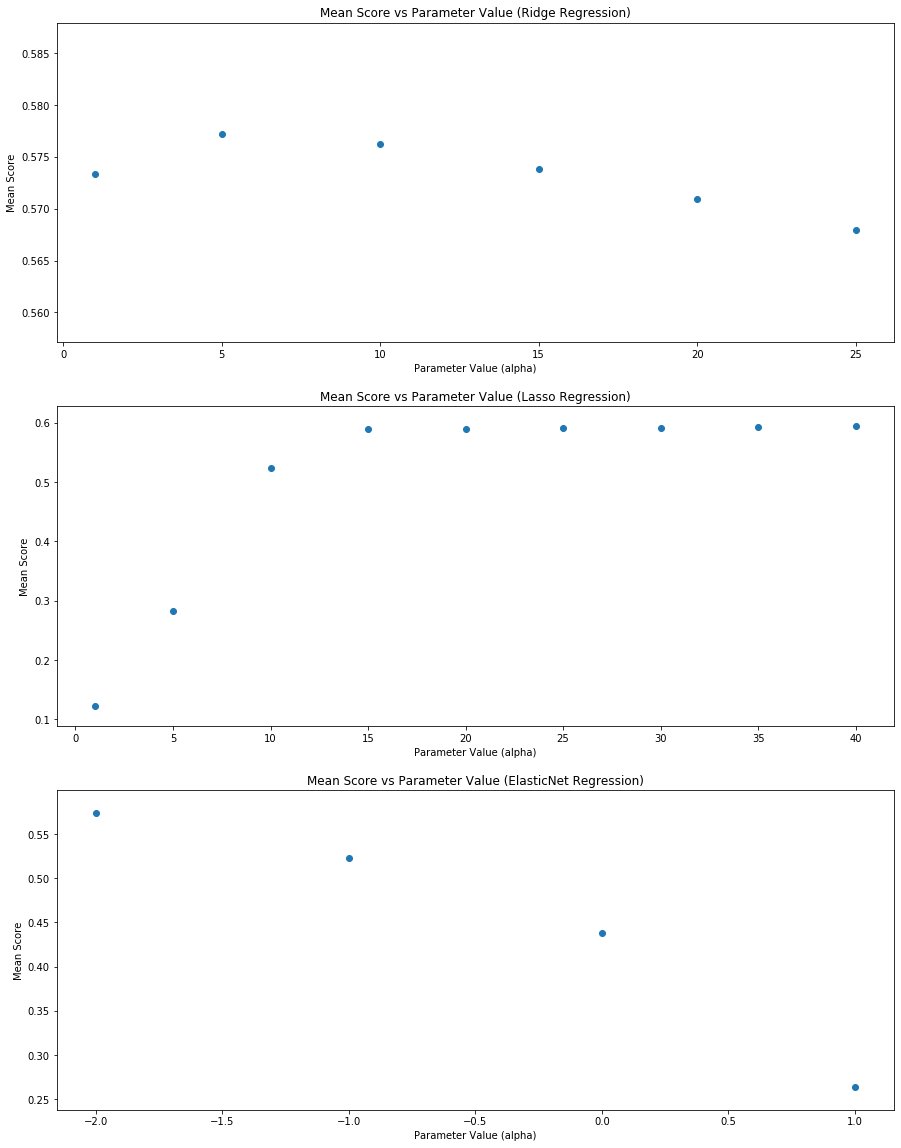

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(15,20));

ax[0].scatter(rg_results["param_ridge__alpha"], rg_results["mean_test_score"]);
ax[0].set_xlabel("Parameter Value (alpha)");
ax[0].set_ylabel("Mean Score");
ax[0].set_title("Mean Score vs Parameter Value (Ridge Regression)");

ax[1].scatter(ls_results["param_lasso__alpha"], ls_results["mean_test_score"]);
ax[1].set_xlabel("Parameter Value (alpha)");
ax[1].set_ylabel("Mean Score");
ax[1].set_title("Mean Score vs Parameter Value (Lasso Regression)");

ax[2].scatter(np.log10(list(en_results["param_elasticnet__alpha"])), en_results["mean_test_score"]);
ax[2].set_xlabel("Parameter Value (alpha)");
ax[2].set_ylabel("Mean Score");
ax[2].set_title("Mean Score vs Parameter Value (ElasticNet Regression)");

Task 2.6

In [21]:
rg = Ridge(alpha=5)
rg_ = make_pipeline(preprocess, rg)
rg_.fit(train_data_x, train_data_y)

x = ohe.fit(train_data_x[cat_cols])
cols = list(x.get_feature_names())
cols = cont_cols + median_cols + mean_cols + cols
coef = list(rg.coef_)

In [22]:
top_coefs_rg = pd.DataFrame({"Column Name":cols, "Coefficient":coef})
top_coefs_rg = top_coefs_rg.sort_values(by=["Coefficient"], ascending=False).reset_index()
top_coefs_rg = top_coefs_rg.loc[:20, ]

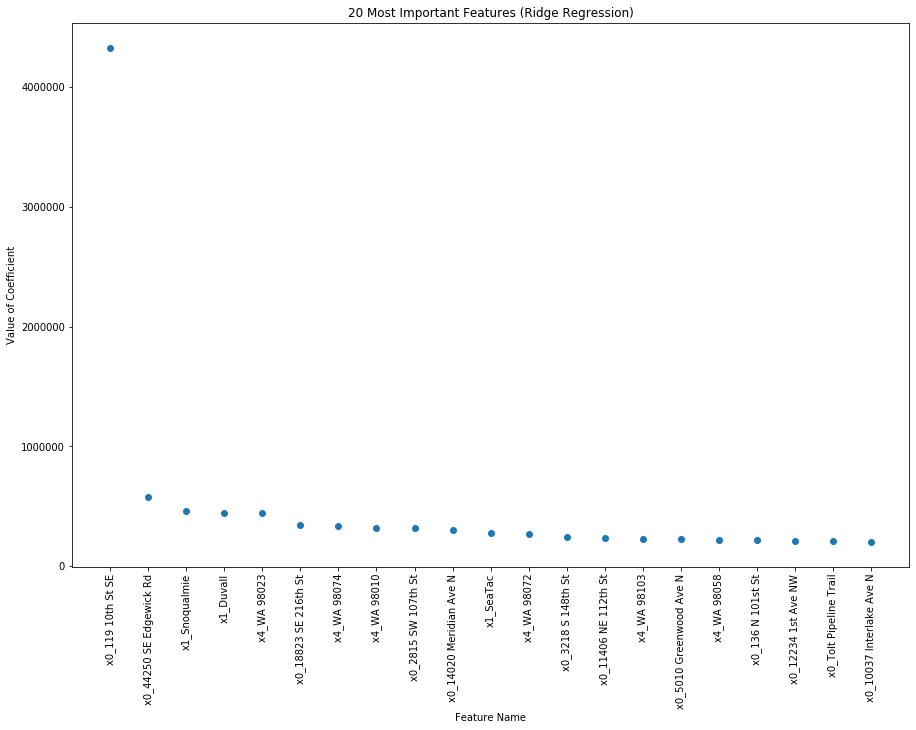

In [23]:
fig = plt.subplots(1,1,figsize=(15,10))
plt.scatter(top_coefs_rg["Column Name"], top_coefs_rg["Coefficient"] )
plt.xticks(rotation=90);
plt.xlabel("Feature Name");
plt.ylabel("Value of Coefficient");
plt.title("20 Most Important Features (Ridge Regression)");

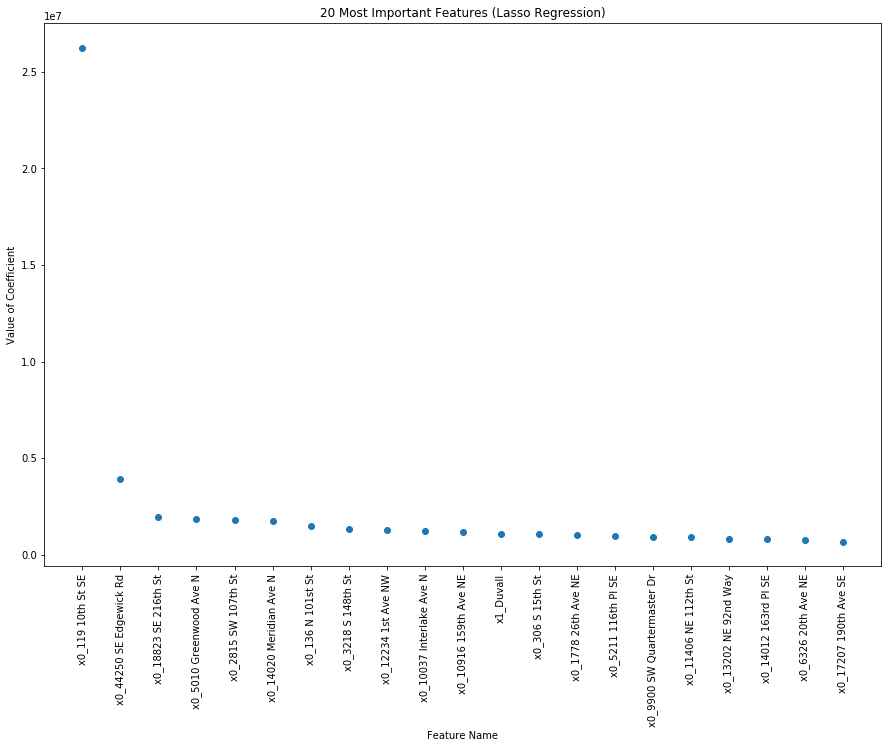

In [24]:
ls = Lasso(max_iter=5000, tol=0.01, alpha=40)
ls_ = make_pipeline(preprocess, ls)
ls_.fit(train_data_x, train_data_y)

x = ohe.fit(train_data_x[cat_cols])
cols = list(x.get_feature_names())
cols = cont_cols + median_cols + mean_cols + cols
coef = list(ls.coef_)

top_coefs_ls = pd.DataFrame({"Column Name":cols, "Coefficient":coef})
top_coefs_ls = top_coefs_ls.sort_values(by=["Coefficient"], ascending=False).reset_index()
top_coefs_ls = top_coefs_ls.loc[:20, ]

fig = plt.subplots(1,1,figsize=(15,10))
plt.scatter(top_coefs_ls["Column Name"], top_coefs_ls["Coefficient"] )
plt.xticks(rotation=90);
plt.xlabel("Feature Name");
plt.ylabel("Value of Coefficient");
plt.title("20 Most Important Features (Lasso Regression)");

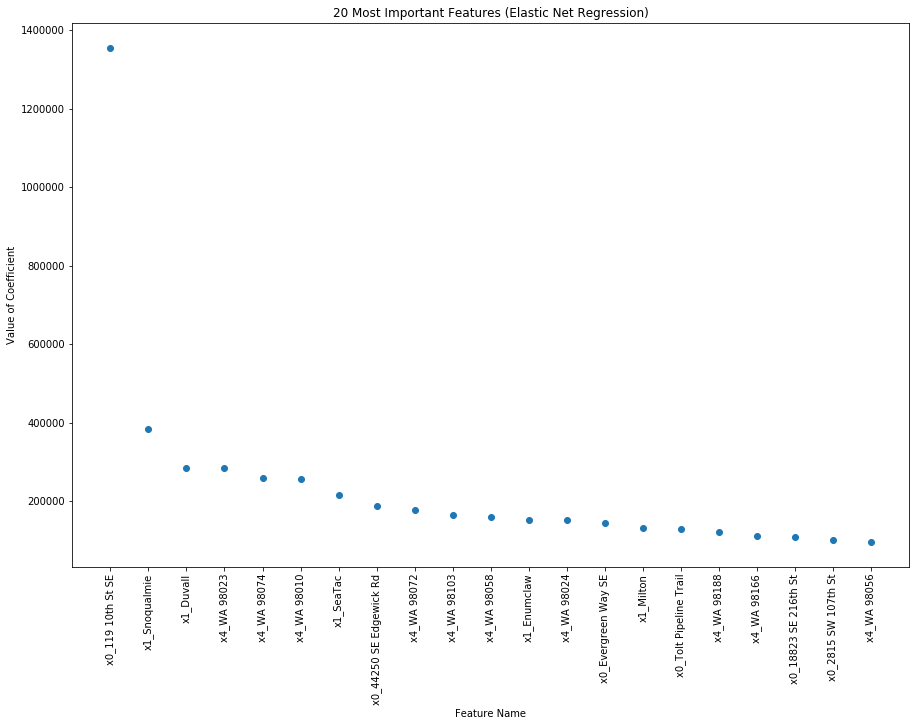

In [25]:
en = ElasticNet(max_iter=2000, tol=0.32, alpha=0.01)
en_ = make_pipeline(preprocess, en)
en_.fit(train_data_x, train_data_y)

x = ohe.fit(train_data_x[cat_cols])
cols = list(x.get_feature_names())
cols = cont_cols + median_cols + mean_cols + cols
coef = list(en.coef_)

top_coefs_en = pd.DataFrame({"Column Name":cols, "Coefficient":coef})
top_coefs_en = top_coefs_en.sort_values(by=["Coefficient"], ascending=False).reset_index()
top_coefs_en = top_coefs_en.loc[:20, ]

fig = plt.subplots(1,1,figsize=(15,10))
plt.scatter(top_coefs_en["Column Name"], top_coefs_en["Coefficient"] )
plt.xticks(rotation=90);
plt.xlabel("Feature Name");
plt.ylabel("Value of Coefficient");
plt.title("20 Most Important Features (Elastic Net Regression)");

In [26]:
set_ls = set(list(top_coefs_ls["Column Name"]))
set_rg = set(list(top_coefs_rg["Column Name"]))
set_en = set(list(top_coefs_en["Column Name"]))

In [27]:
print(set_ls-set_rg)

{'x0_17207 190th Ave SE', 'x0_6326 20th Ave NE', 'x0_1778 26th Ave NE', 'x0_10916 159th Ave NE', 'x0_13202 NE 92nd Way', 'x0_9900 SW Quartermaster Dr', 'x0_5211 116th Pl SE', 'x0_306 S 15th St', 'x0_14012 163rd Pl SE'}


In [28]:
print(set_ls-set_en)

{'x0_136 N 101st St', 'x0_17207 190th Ave SE', 'x0_6326 20th Ave NE', 'x0_1778 26th Ave NE', 'x0_10916 159th Ave NE', 'x0_5010 Greenwood Ave N', 'x0_13202 NE 92nd Way', 'x0_10037 Interlake Ave N', 'x0_11406 NE 112th St', 'x0_12234 1st Ave NW', 'x0_9900 SW Quartermaster Dr', 'x0_5211 116th Pl SE', 'x0_306 S 15th St', 'x0_3218 S 148th St', 'x0_14020 Meridian Ave N', 'x0_14012 163rd Pl SE'}


In [29]:
print(set_en-set_rg)

{'x4_WA 98166', 'x4_WA 98024', 'x1_Milton', 'x0_Evergreen Way SE', 'x1_Enumclaw', 'x4_WA 98056', 'x4_WA 98188'}


 Ans - None of them agree on the most important features